> Kanishk Khandare
> DS24MS15

###  Import libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor

###  Load dataset

In [102]:
df = pd.read_csv('concrete_data.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [104]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [105]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

###  Data cleaning

In [106]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


###  EDA
- Univariate analysis

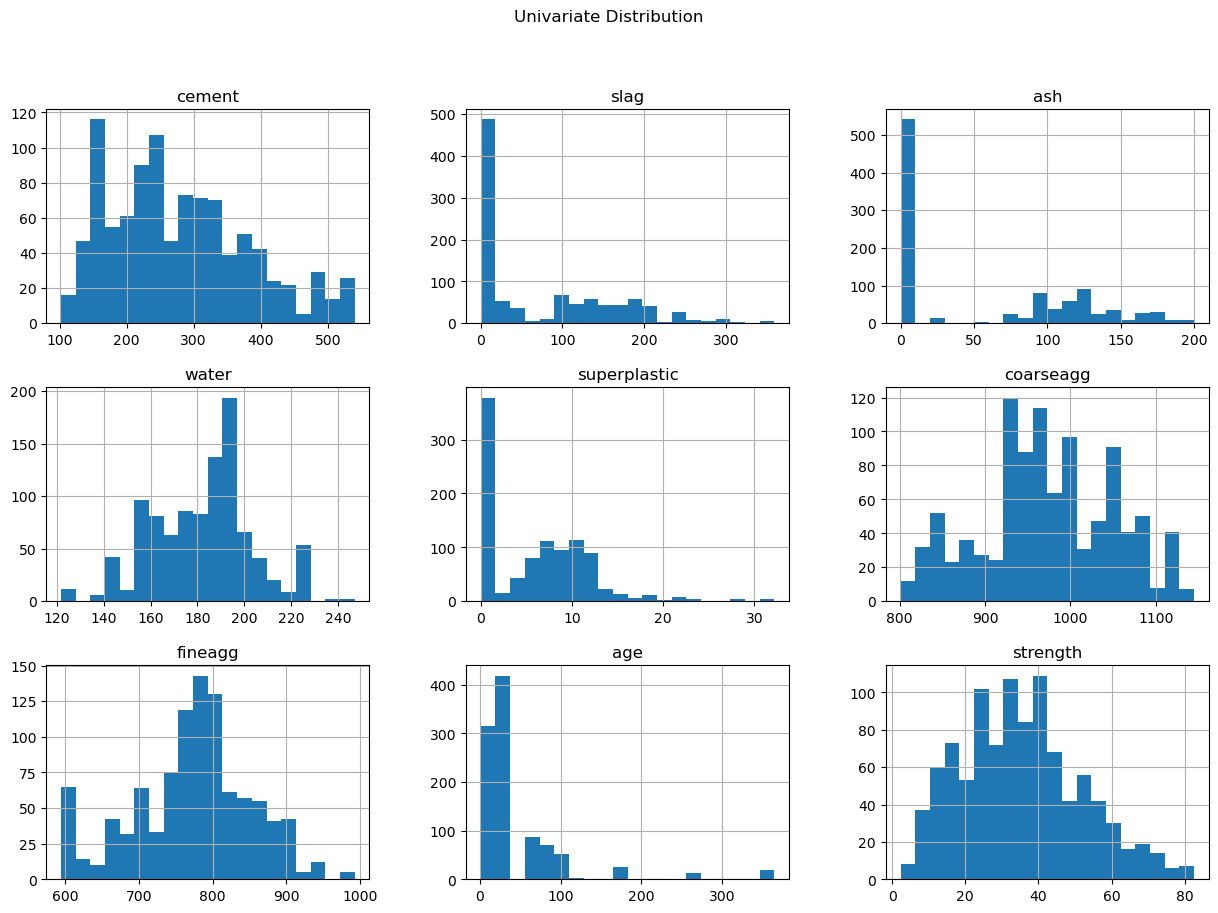

In [107]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.show()

- Bivariate analysis

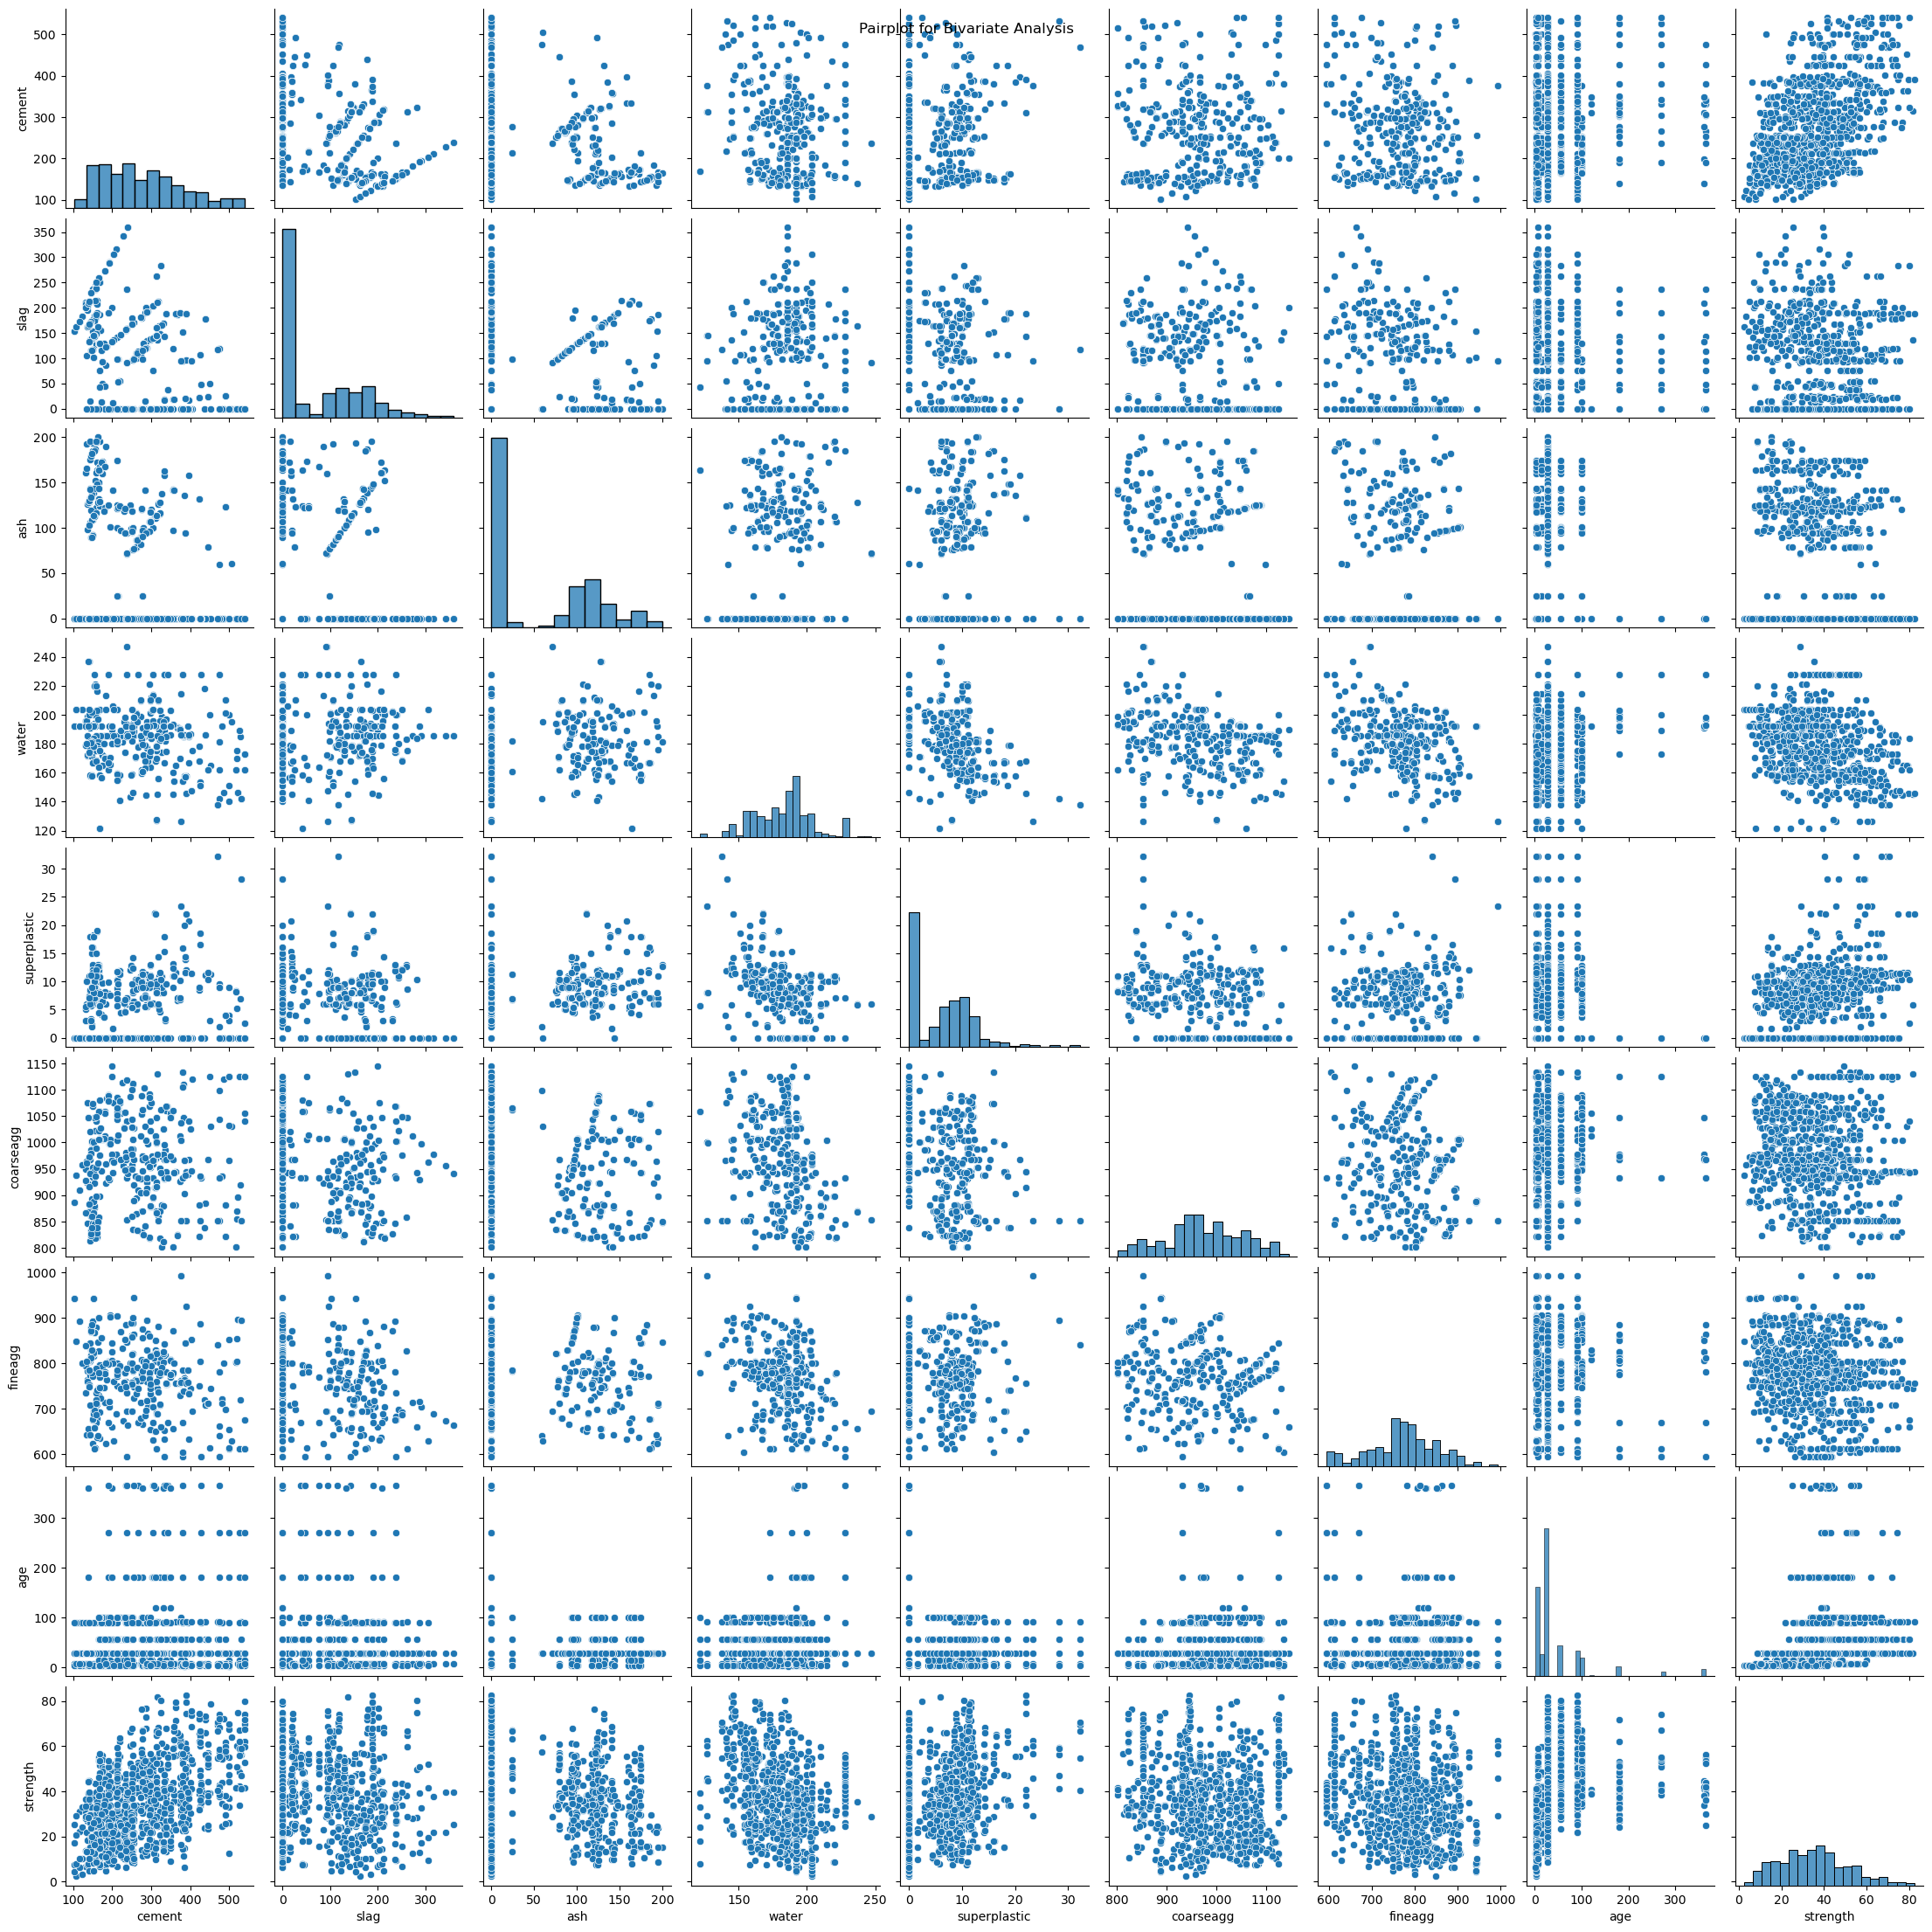

In [108]:
sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

### Correlation analysis

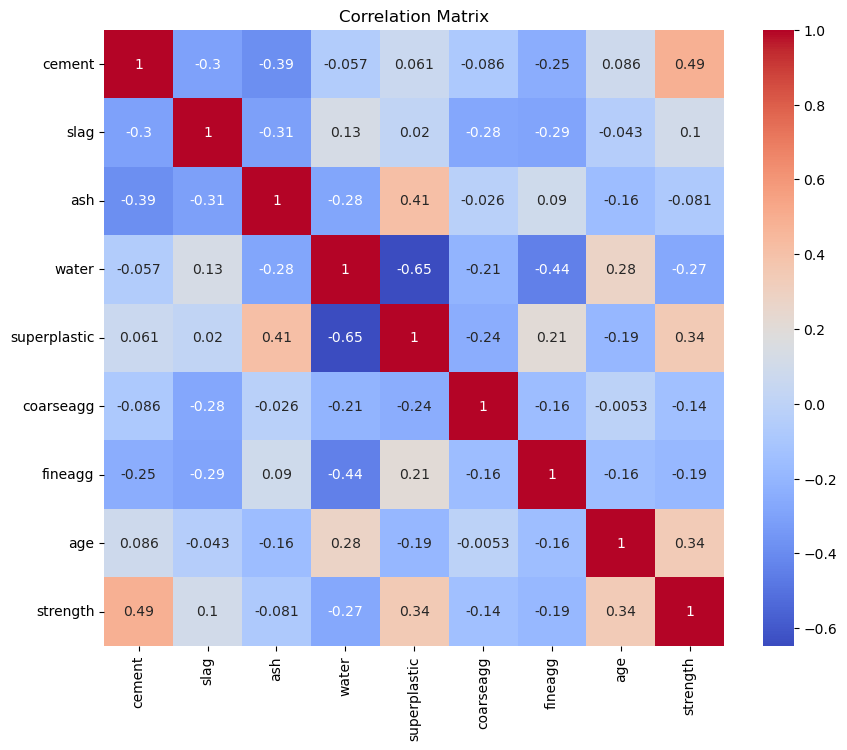

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Scatter Plot
- Strength vs Cement

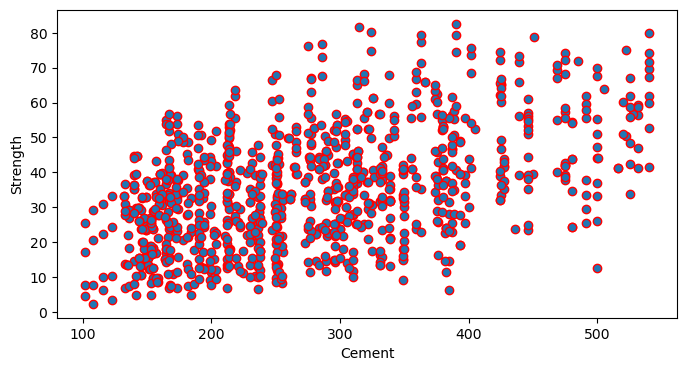

In [110]:
plt.figure(figsize=[8,4])
plt.scatter(y='strength', x='cement', edgecolors='red', data=df)
plt.ylabel('Strength')
plt.xlabel('Cement')
plt.show()

- Strength vs Ash

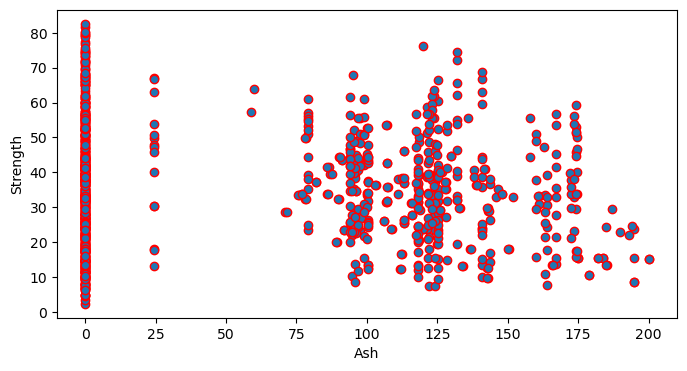

In [111]:
plt.figure(figsize=[8,4])
plt.scatter(y='strength', x='ash', edgecolors='red', data=df)
plt.ylabel('Strength')
plt.xlabel('Ash')
plt.show()

###  Outlier treatment

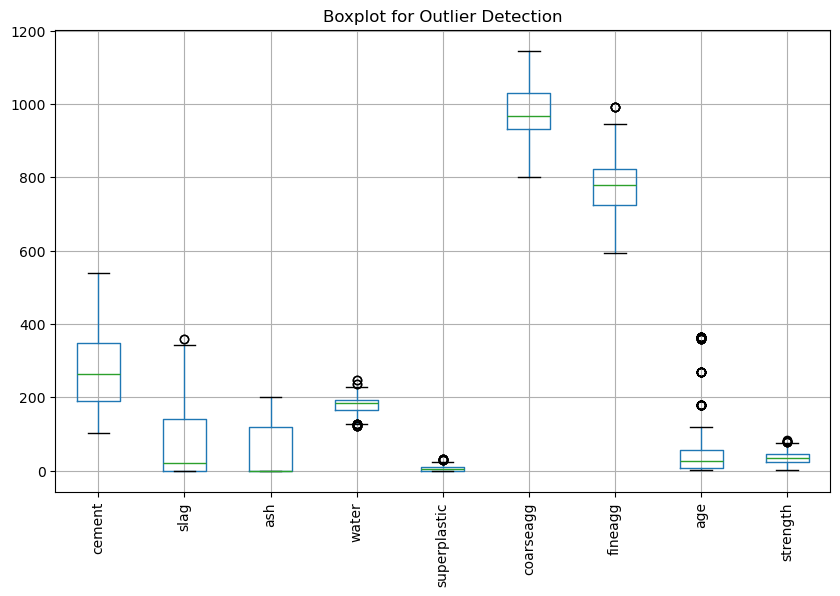

In [112]:
plt.figure(figsize=(10, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


In [114]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        911 non-null    float64
 1   slag          911 non-null    float64
 2   ash           911 non-null    float64
 3   water         911 non-null    float64
 4   superplastic  911 non-null    float64
 5   coarseagg     911 non-null    float64
 6   fineagg       911 non-null    float64
 7   age           911 non-null    int64  
 8   strength      911 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 71.2 KB


###  Check distribution and apply transformations if necessary
- https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

In [115]:
from scipy.stats import skew, kurtosis
print("Skewness and Kurtosis:\n")
for column in df.columns:
    print(f"{column}: Skewness={skew(df[column]):.2f}, Kurtosis={kurtosis(df[column]):.2f}")

Skewness and Kurtosis:

cement: Skewness=0.60, Kurtosis=-0.37
slag: Skewness=0.83, Kurtosis=-0.54
ash: Skewness=0.37, Kurtosis=-1.46
water: Skewness=0.04, Kurtosis=-0.16
superplastic: Skewness=0.30, Kurtosis=-0.73
coarseagg: Skewness=-0.14, Kurtosis=-0.57
fineagg: Skewness=-0.29, Kurtosis=-0.05
age: Skewness=1.27, Kurtosis=0.68
strength: Skewness=0.39, Kurtosis=-0.42


###  Feature engineering
- There is no categorical variables in this dataset

###  Split the data into training and testing sets

In [116]:
X = df.drop('strength', axis=1)
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Feature Scaling

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  Training Linear regression model & evaluate
- https://www.geeksforgeeks.org/evaluation-metrics-for-classification-model-in-python/

In [118]:
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Evaluation:")
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    print(f"Adjusted R2 Score: {adj_r2:.2f}")
    
    # Visualize actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.show()

    # Print actual vs predicted difference
    diff = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred, 'Difference': y_test.values - y_pred})
    print(diff.head())


Linear Regression Evaluation:
MAE: 6.32
MSE: 65.83
RMSE: 8.11
R2 Score: 0.74
Adjusted R2 Score: 0.73


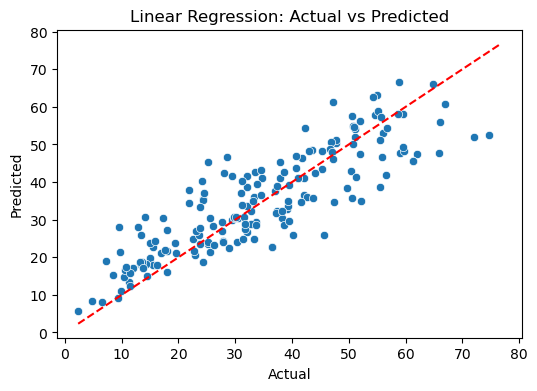

   Actual  Predicted  Difference
0   38.20  30.508214    7.691786
1   22.63  24.807333   -2.177333
2   30.23  24.160274    6.069726
3   54.60  57.720321   -3.120321
4   37.43  32.365359    5.064641
Training R² Score: 76.28
Testing R² Score: 74.11


In [119]:
# Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, "Linear Regression")
print("Training R² Score:", round(lr_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(lr_model.score(X_test_scaled, y_test)*100, 2))


Decision Tree Evaluation:
MAE: 4.47
MSE: 47.31
RMSE: 6.88
R2 Score: 0.81
Adjusted R2 Score: 0.81


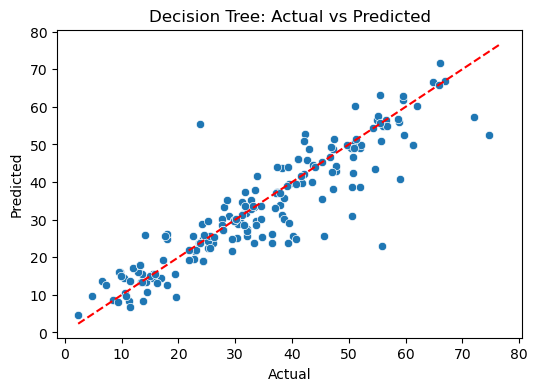

   Actual  Predicted  Difference
0   38.20      31.27        6.93
1   22.63      25.75       -3.12
2   30.23      25.10        5.13
3   54.60      43.38       11.22
4   37.43      37.43        0.00
Training R² Score: 99.9
Testing R² Score: 81.39


In [120]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, "Decision Tree")
print("Training R² Score:", round(dt_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(dt_model.score(X_test_scaled, y_test)*100, 2))


Random Forest Evaluation:
MAE: 3.67
MSE: 28.15
RMSE: 5.31
R2 Score: 0.89
Adjusted R2 Score: 0.88


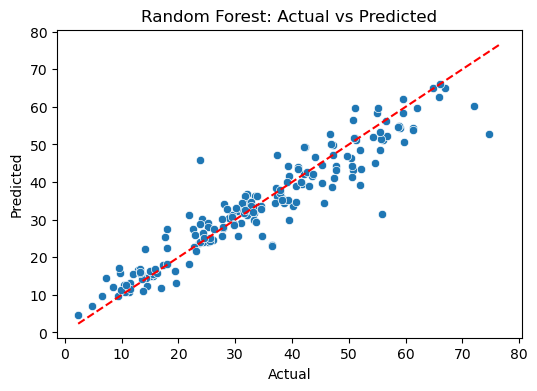

   Actual  Predicted  Difference
0   38.20    35.8372      2.3628
1   22.63    27.5818     -4.9518
2   30.23    32.2286     -1.9986
3   54.60    45.1329      9.4671
4   37.43    36.2383      1.1917
Training R² Score: 98.58
Testing R² Score: 88.93


In [121]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, "Random Forest")
print("Training R² Score:", round(rf_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(rf_model.score(X_test_scaled, y_test)*100, 2))


Support Vector Machine Evaluation:
MAE: 6.82
MSE: 77.54
RMSE: 8.81
R2 Score: 0.69
Adjusted R2 Score: 0.68


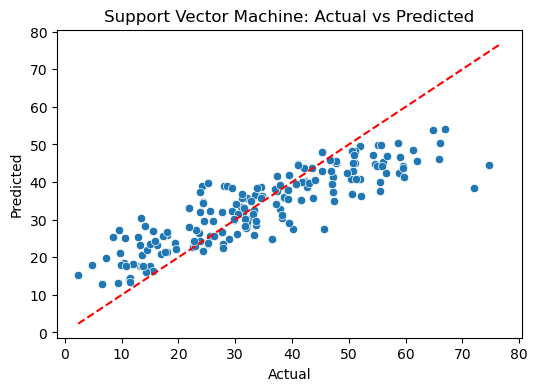

   Actual  Predicted  Difference
0   38.20  30.316159    7.883841
1   22.63  22.650574   -0.020574
2   30.23  26.264340    3.965660
3   54.60  44.739253    9.860747
4   37.43  37.539001   -0.109001
Training R² Score: 72.12
Testing R² Score: 69.5


In [122]:
# Support Vector Machine
svm_model = SVR()
evaluate_model(svm_model, "Support Vector Machine")
print("Training R² Score:", round(svm_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(svm_model.score(X_test_scaled, y_test)*100, 2))


K Nearest Neighbors Evaluation:
MAE: 5.98
MSE: 61.85
RMSE: 7.86
R2 Score: 0.76
Adjusted R2 Score: 0.75


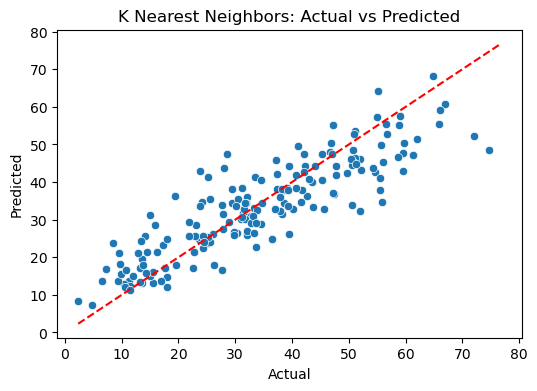

   Actual  Predicted  Difference
0   38.20     31.634       6.566
1   22.63     17.142       5.488
2   30.23     26.388       3.842
3   54.60     42.796      11.804
4   37.43     38.212      -0.782
Training R² Score: 86.24
Testing R² Score: 75.67


In [123]:
# K Nearest Neighbors
knn_model = KNeighborsRegressor()
evaluate_model(knn_model, "K Nearest Neighbors")
print("Training R² Score:", round(knn_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(knn_model.score(X_test_scaled, y_test)*100, 2))


XGBoost Regressor Evaluation:
MAE: 3.41
MSE: 26.69
RMSE: 5.17
R2 Score: 0.90
Adjusted R2 Score: 0.89


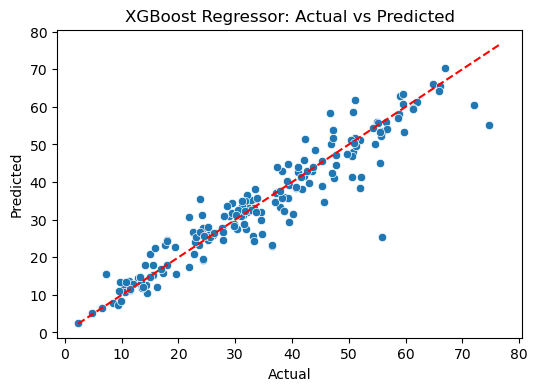

   Actual  Predicted  Difference
0   38.20  43.001595   -4.801595
1   22.63  26.650112   -4.020112
2   30.23  27.642992    2.587008
3   54.60  50.101856    4.498144
4   37.43  37.234211    0.195789
Training R² Score: 99.82
Testing R² Score: 89.5


In [124]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
evaluate_model(xgb_model, "XGBoost Regressor")
print("Training R² Score:", round(xgb_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(xgb_model.score(X_test_scaled, y_test)*100, 2))

###  Cross Validation
- https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [125]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('K Nearest Neighbors', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
]
print("K-Fold Cross Validation Scores (5 folds):\n")
for name, model in models:
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f"{name} = Mean R²: {scores.mean():.2f}, Std Dev: {scores.std():.2f}")

K-Fold Cross Validation Scores (5 folds):

Linear Regression = Mean R²: 0.75, Std Dev: 0.02
Decision Tree = Mean R²: 0.83, Std Dev: 0.04
Random Forest = Mean R²: 0.90, Std Dev: 0.02
Support Vector Machine = Mean R²: 0.20, Std Dev: 0.02
K Nearest Neighbors = Mean R²: 0.65, Std Dev: 0.05
XGBoost Regressor = Mean R²: 0.91, Std Dev: 0.02


###  Conclusion
XGBoost and Random Forest are the top-performing models for predicting concrete compressive strength in this dataset.